In [1]:
import pandas as pd
import numpy as np

# --- 1. โหลดข้อมูลที่จำเป็น ---

# กำหนดที่ตั้งของไฟล์ ER tables ของคุณ
er_dir = '../../data/openFDA_drug_event/er_tables_memory_efficient/'
# ที่ตั้งของไฟล์ข้อมูลผู้ป่วยเด็กที่ผ่านการ clean แล้ว
pediatric_data_path = '../../data/pediatric_patients_report_serious_reporter.csv.gz'

try:
    # โหลดข้อมูลยาแบบ Non-standard (ข้อมูลดิบ)
    df_non_standard = pd.read_csv(er_dir + 'drugcharacteristics.csv.gz',
                                  compression='gzip',
                                  dtype={'safetyreportid': 'str'})

    # โหลดข้อมูลยาแบบ Standard (ที่เชื่อมกับ RxNorm แล้ว)
    df_standard = pd.read_csv(er_dir + 'standard_drugs.csv.gz',
                              compression='gzip',
                              dtype={'safetyreportid': 'str', 'RxNorm_concept_id': 'str'})

    # โหลดข้อมูลผู้ป่วยเด็กเพื่อเอารายชื่อ safetyreportid
    df_pediatric_reports = pd.read_csv(pediatric_data_path,
                                       compression='gzip',
                                       index_col=0,
                                       dtype={'safetyreportid': 'str'})
    
    pediatric_report_ids = df_pediatric_reports['safetyreportid'].unique()
    print("โหลดข้อมูลสำเร็จ")
    
except FileNotFoundError as e:
    print(f"ไม่พบไฟล์: {e.filename}")
    print("กรุณาตรวจสอบว่า path ของไฟล์ถูกต้อง และไฟล์ได้ถูกสร้างจาก notebook ก่อนหน้านี้แล้ว")
    # หยุดการทำงานของโค้ดส่วนที่เหลือหากหาไฟล์ไม่เจอ
    df_non_standard = None

# --- ดำเนินการต่อถ้าโหลดไฟล์สำเร็จ ---
if df_non_standard is not None:

    print("\n" + "="*50)
    print("การวิเคราะห์ข้อมูลยาทั้งหมด (Overall Drug Data Analysis)")
    print("="*50)

    # --- 2. วิเคราะห์ข้อมูลยาแบบ Non-standard ---
    print("\n--- 2. ข้อมูลยาแบบ Non-standard (จาก drugcharacteristics.csv.gz) ---")
    print(f"จำนวนรายการยาทั้งหมด (แถว): {len(df_non_standard):,}")
    print(f"จำนวนรายงาน (safetyreportid) ที่ไม่ซ้ำกัน: {df_non_standard['safetyreportid'].nunique():,}")
    print(f"จำนวนชื่อยา (medicinal_product) ที่ไม่ซ้ำกัน: {df_non_standard['medicinal_product'].nunique():,}")
    print("\nข้อมูลที่สูญหาย (Missing Data):")
    print(df_non_standard.isnull().sum())


    # --- 3. วิเคราะห์ข้อมูลยาแบบ Standard ---
    print("\n--- 3. ข้อมูลยาแบบ Standard (จาก standard_drugs.csv.gz) ---")
    print(f"จำนวนรายการยาทั้งหมด (แถว): {len(df_standard):,}")
    print(f"จำนวนรายงาน (safetyreportid) ที่ไม่ซ้ำกัน: {df_standard['safetyreportid'].nunique():,}")
    print(f"จำนวนยาที่เป็น Standard (RxNorm_concept_id) ที่ไม่ซ้ำกัน: {df_standard['RxNorm_concept_id'].nunique():,}")
    print("\nข้อมูลที่สูญหาย (Missing Data):")
    print(df_standard.isnull().sum())


    print("\n" + "="*50)
    print("การเปรียบเทียบในกลุ่มผู้ป่วยเด็ก (Pediatric Cohort Comparison)")
    print("="*50)

    # --- 4. เปรียบเทียบกับกลุ่มผู้ป่วยเด็ก ---
    print(f"\nจำนวนรายงานทั้งหมดในกลุ่มผู้ป่วยเด็ก: {len(pediatric_report_ids):,}")

    # กรองข้อมูลยา Non-standard ให้เหลือเฉพาะในกลุ่มผู้ป่วยเด็ก
    non_standard_drugs_pediatric = df_non_standard[df_non_standard['safetyreportid'].isin(pediatric_report_ids)]
    print(f"\n- เหลือจำนวน 'รายการยา Non-standard' ในกลุ่มผู้ป่วยเด็ก: {len(non_standard_drugs_pediatric):,}")
    print(f"  (จาก {non_standard_drugs_pediatric['safetyreportid'].nunique():,} รายงาน)")


    # กรองข้อมูลยา Standard ให้เหลือเฉพาะในกลุ่มผู้ป่วยเด็ก
    standard_drugs_pediatric = df_standard[df_standard['safetyreportid'].isin(pediatric_report_ids)]
    print(f"\n- เหลือจำนวน 'รายการยา Standard' ในกลุ่มผู้ป่วยเด็ก: {len(standard_drugs_pediatric):,}")
    print(f"  (จาก {standard_drugs_pediatric['safetyreportid'].nunique():,} รายงาน)")

โหลดข้อมูลสำเร็จ

การวิเคราะห์ข้อมูลยาทั้งหมด (Overall Drug Data Analysis)

--- 2. ข้อมูลยาแบบ Non-standard (จาก drugcharacteristics.csv.gz) ---
จำนวนรายการยาทั้งหมด (แถว): 64,177,920
จำนวนรายงาน (safetyreportid) ที่ไม่ซ้ำกัน: 19,026,493
จำนวนชื่อยา (medicinal_product) ที่ไม่ซ้ำกัน: 840,885

ข้อมูลที่สูญหาย (Missing Data):
drug_administration      23640189
drug_characterization          23
drug_indication          20821528
medicinal_product            1502
safetyreportid                  0
dtype: int64

--- 3. ข้อมูลยาแบบ Standard (จาก standard_drugs.csv.gz) ---
จำนวนรายการยาทั้งหมด (แถว): 15,330
จำนวนรายงาน (safetyreportid) ที่ไม่ซ้ำกัน: 2,815
จำนวนยาที่เป็น Standard (RxNorm_concept_id) ที่ไม่ซ้ำกัน: 15,330

ข้อมูลที่สูญหาย (Missing Data):
RxNorm_concept_class_id    0
RxNorm_concept_code        0
RxNorm_concept_id          0
RxNorm_concept_name        0
safetyreportid             0
dtype: int64

การเปรียบเทียบในกลุ่มผู้ป่วยเด็ก (Pediatric Cohort Comparison)

จำนวนรายงานทั้งหมดในกลุ่มผ

--- ขั้นตอนที่ 1: กำลังโหลดข้อมูล... ---
โหลดข้อมูลสำเร็จ!


ขั้นตอนที่ 2: วิเคราะห์ข้อมูลยาดิบ (Non-Standard)

--- 2.1 ภาพรวมและข้อมูลที่สูญหาย ---
จำนวนรายการยาดิบทั่วประเทศ: 64,177,920
จำนวนรายงานที่มีข้อมูลยา: 19,026,493

ค่าที่สูญหาย (Missing Values):
drug_administration      23640189
drug_characterization          23
drug_indication          20821528
medicinal_product            1502
safetyreportid                  0
dtype: int64

--- 2.2 Top 10 ชื่อยาที่ถูกรายงานบ่อยที่สุด (ข้อมูลดิบ) ---
medicinal_product
HUMIRA          809145
ENBREL          645150
ZANTAC          615209
REVLIMID        515008
DUPIXENT        392202
ASPIRIN         291705
METHOTREXATE    286494
METFORMIN       284000
PREDNISONE      276729
XARELTO         270754
Name: count, dtype: int64


/tmp/ipykernel_13731/458371082.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_non_standard_drugs.values, y=top_10_non_standard_drugs.index, palette='viridis')


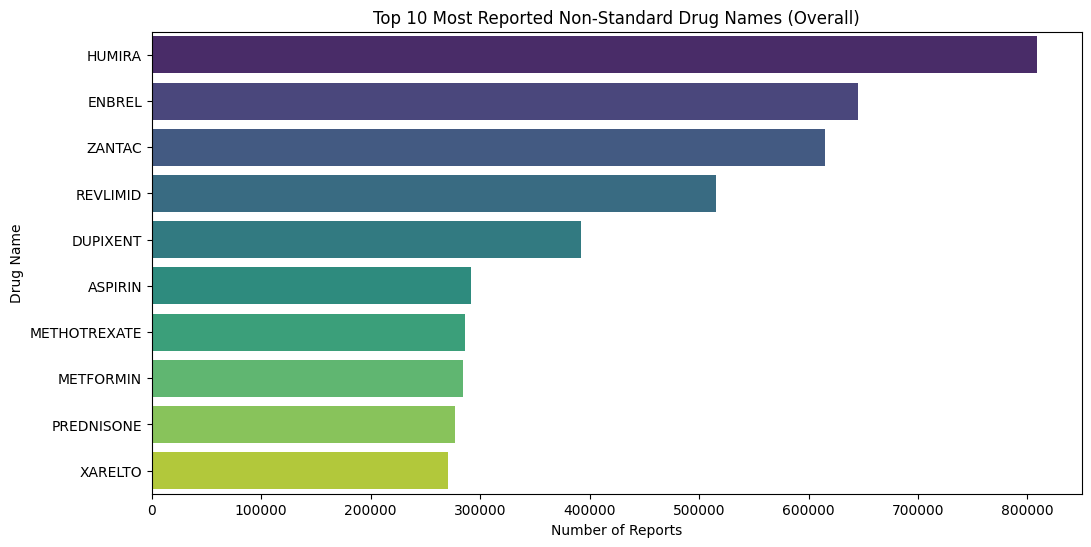



ขั้นตอนที่ 3: วิเคราะห์ข้อมูลยามาตรฐาน (Standard)

--- 3.1 ภาพรวม ---
จำนวนรายการยาที่ทำ Standard ได้ทั่วประเทศ: 15,330
จำนวนรายงานที่มีข้อมูลยา Standard: 2,815

--- 3.2 Top 10 ยามาตรฐานที่พบบ่อยที่สุด ---
RxNorm_concept_name
{7 (ethinyl estradiol 0.035 MG / norgestimate 0.18 MG Oral Tablet) / 7 (ethinyl estradiol 0.035 MG / norgestimate 0.215 MG Oral Tablet) / 7 (ethinyl estradiol 0.035 MG / norgestimate 0.25 MG Oral Tablet) / 7 (inert ingredients 1 MG Oral Tablet) } Pack...     7
{7 (ethinyl estradiol 0.025 MG / norgestimate 0.18 MG Oral Tablet) / 7 (ethinyl estradiol 0.025 MG / norgestimate 0.215 MG Oral Tablet) / 7 (ethinyl estradiol 0.025 MG / norgestimate 0.25 MG Oral Tablet) / 7 (inert ingredients 1 MG Oral Tablet) } Pack...     5
{6 (ethinyl estradiol 0.03 MG / levonorgestrel 0.05 MG Oral Tablet) / 10 (ethinyl estradiol 0.03 MG / levonorgestrel 0.125 MG Oral Tablet) / 5 (ethinyl estradiol 0.04 MG / levonorgestrel 0.075 MG Oral Tablet) / 7 (inert ingredients 1 MG Oral Tablet) 

/tmp/ipykernel_13731/458371082.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_standard_drugs.values, y=top_10_standard_drugs.index, palette='plasma')


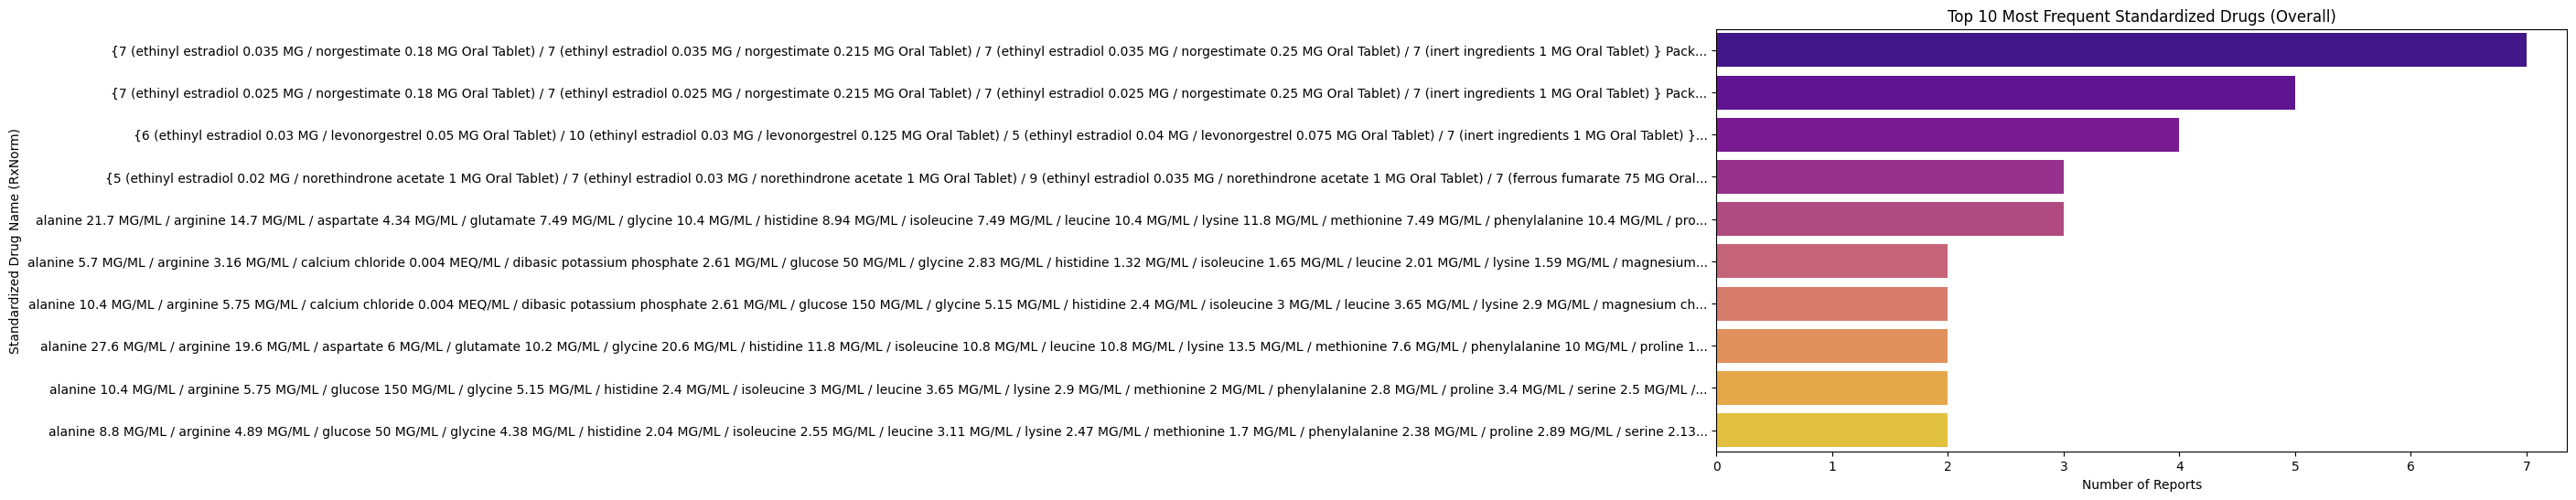



ขั้นตอนที่ 4: เจาะลึกและเปรียบเทียบในกลุ่มผู้ป่วยเด็ก
จำนวนรายงานในกลุ่มผู้ป่วยเด็กทั้งหมด: 923,409
  - จำนวนรายการยาดิบในกลุ่มผู้ป่วยเด็ก: 2,909,673
  - จำนวนรายการยามาตรฐานในกลุ่มผู้ป่วยเด็ก: 1,346
  - จำนวนรายงานที่มีข้อมูลยามาตรฐานในกลุ่มผู้ป่วยเด็ก: 222

--- 4.1 Top 10 ยามาตรฐานที่พบบ่อยที่สุดในกลุ่มผู้ป่วยเด็ก ---
RxNorm_concept_name
{5 (ethinyl estradiol 0.02 MG / norethindrone acetate 1 MG Oral Tablet) / 7 (ethinyl estradiol 0.03 MG / norethindrone acetate 1 MG Oral Tablet) / 9 (ethinyl estradiol 0.035 MG / norethindrone acetate 1 MG Oral Tablet) / 7 (ferrous fumarate 75 MG Oral...    2
0.7 ML asfotase alfa 40 MG/ML Injection [Strensiq]                                                                                                                                                                                                                1
1 ML asfotase alfa 40 MG/ML Injection [Strensiq]                                                                                        

/tmp/ipykernel_13731/458371082.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_standard_pediatric.values, y=top_10_standard_pediatric.index, palette='magma')


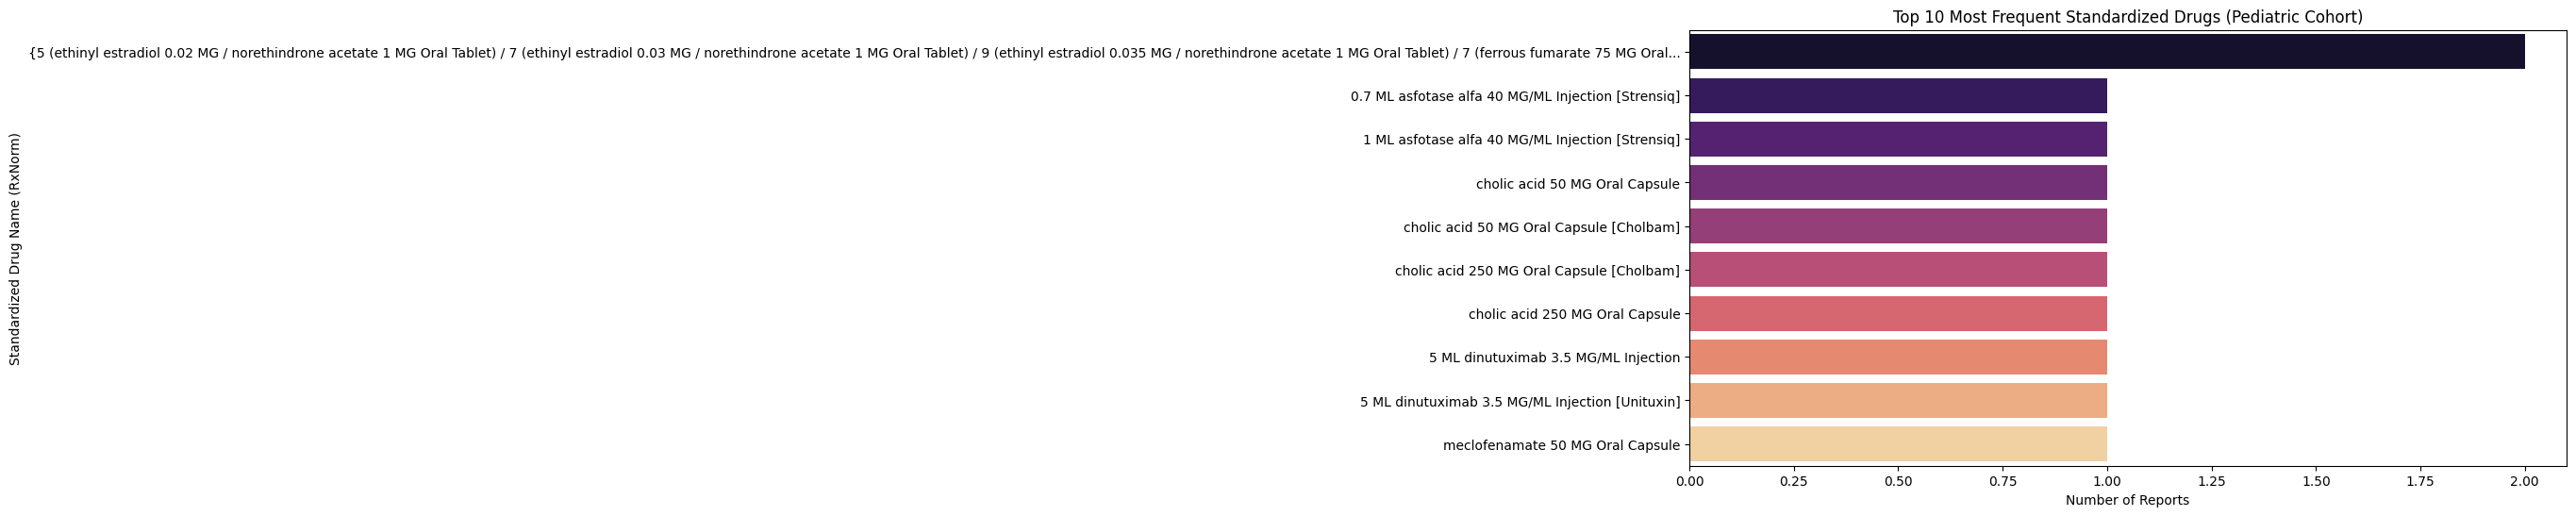



ขั้นตอนที่ 5: สรุปผลการวิเคราะห์สำหรับนำเสนอ

ตารางสรุปเปรียบเทียบข้อมูลยา:
                Category  Overall Non-Standard  Overall Standard  Pediatric Non-Standard  Pediatric Standard
     จำนวนรายการยา (แถว)              64177920             15330                 2909673                1346
จำนวนรายงานที่เกี่ยวข้อง              19026493              2815                  923409                 222


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ตั้งค่าให้กราฟแสดงผลภาษาไทยได้ (จำเป็นต้องติดตั้งฟอนต์ที่รองรับ)
# หากรันใน Colab หรือสภาพแวดล้อมที่ไม่มีฟอนต์ไทย อาจต้องติดตั้งเพิ่มเติม
# plt.rcParams['font.family'] = 'tahoma' # หรือฟอนต์อื่นๆ เช่น 'Leelawadee UI'

# --- ขั้นตอนที่ 1: การเตรียมข้อมูล (Data Preparation) ---
print("--- ขั้นตอนที่ 1: กำลังโหลดข้อมูล... ---")

# กำหนดที่ตั้งของไฟล์
er_dir = '../../data/openFDA_drug_event/er_tables_memory_efficient/'
pediatric_data_path = '../../data/pediatric_patients_report_serious_reporter.csv.gz'

try:
    # โหลดข้อมูลยา Non-standard
    df_non_standard = pd.read_csv(er_dir + 'drugcharacteristics.csv.gz',
                                  compression='gzip',
                                  dtype={'safetyreportid': 'str'})

    # โหลดข้อมูลยา Standard
    df_standard = pd.read_csv(er_dir + 'standard_drugs.csv.gz',
                              compression='gzip',
                              dtype={'safetyreportid': 'str', 'RxNorm_concept_id': 'str'})

    # โหลด ID ของกลุ่มผู้ป่วยเด็ก
    df_pediatric_reports = pd.read_csv(pediatric_data_path,
                                       compression='gzip',
                                       index_col=0,
                                       dtype={'safetyreportid': 'str'})
    
    pediatric_report_ids = df_pediatric_reports['safetyreportid'].unique()
    print("โหลดข้อมูลสำเร็จ!")

except FileNotFoundError as e:
    print(f"ไม่พบไฟล์: {e.filename}")
    print("กรุณาตรวจสอบ Path และให้แน่ใจว่าไฟล์ได้ถูกสร้างจากสคริปต์ก่อนหน้านี้แล้ว")
    df_non_standard = None

# --- เริ่มการวิเคราะห์ถ้าโหลดไฟล์สำเร็จ ---
if df_non_standard is not None:

    # --- ขั้นตอนที่ 2: EDA ข้อมูลยาที่ยังไม่เป็นมาตรฐาน (Non-Standardized Drug Data) ---
    print("\n\n" + "="*60)
    print("ขั้นตอนที่ 2: วิเคราะห์ข้อมูลยาดิบ (Non-Standard)")
    print("="*60)

    # 2.1 ภาพรวมและข้อมูลที่สูญหาย
    print("\n--- 2.1 ภาพรวมและข้อมูลที่สูญหาย ---")
    print(f"จำนวนรายการยาดิบทั่วประเทศ: {len(df_non_standard):,}")
    print(f"จำนวนรายงานที่มีข้อมูลยา: {df_non_standard['safetyreportid'].nunique():,}")
    print("\nค่าที่สูญหาย (Missing Values):")
    print(df_non_standard.isnull().sum())
    
    # 2.2 10 อันดับชื่อยา (medicinal_product) ที่ถูกรายงานบ่อยที่สุด
    print("\n--- 2.2 Top 10 ชื่อยาที่ถูกรายงานบ่อยที่สุด (ข้อมูลดิบ) ---")
    top_10_non_standard_drugs = df_non_standard['medicinal_product'].value_counts().head(10)
    print(top_10_non_standard_drugs)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_10_non_standard_drugs.values, y=top_10_non_standard_drugs.index, palette='viridis')
    plt.title('Top 10 Most Reported Non-Standard Drug Names (Overall)')
    plt.xlabel('Number of Reports')
    plt.ylabel('Drug Name')
    plt.show()

    # --- ขั้นตอนที่ 3: EDA ข้อมูลยาที่เป็นมาตรฐาน (Standardized Drug Data) ---
    print("\n\n" + "="*60)
    print("ขั้นตอนที่ 3: วิเคราะห์ข้อมูลยามาตรฐาน (Standard)")
    print("="*60)
    
    # 3.1 ภาพรวม
    print("\n--- 3.1 ภาพรวม ---")
    print(f"จำนวนรายการยาที่ทำ Standard ได้ทั่วประเทศ: {len(df_standard):,}")
    print(f"จำนวนรายงานที่มีข้อมูลยา Standard: {df_standard['safetyreportid'].nunique():,}")
    
    # 3.2 10 อันดับยามาตรฐาน (RxNorm_concept_name) ที่พบบ่อยที่สุด
    print("\n--- 3.2 Top 10 ยามาตรฐานที่พบบ่อยที่สุด ---")
    top_10_standard_drugs = df_standard['RxNorm_concept_name'].value_counts().head(10)
    print(top_10_standard_drugs)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_10_standard_drugs.values, y=top_10_standard_drugs.index, palette='plasma')
    plt.title('Top 10 Most Frequent Standardized Drugs (Overall)')
    plt.xlabel('Number of Reports')
    plt.ylabel('Standardized Drug Name (RxNorm)')
    plt.show()

    # --- ขั้นตอนที่ 4: เปรียบเทียบและเจาะลึกในกลุ่มผู้ป่วยเด็ก ---
    print("\n\n" + "="*60)
    print("ขั้นตอนที่ 4: เจาะลึกและเปรียบเทียบในกลุ่มผู้ป่วยเด็ก")
    print("="*60)

    # 4.1 กรองข้อมูลสำหรับกลุ่มผู้ป่วยเด็ก
    non_standard_pediatric = df_non_standard[df_non_standard['safetyreportid'].isin(pediatric_report_ids)]
    standard_pediatric = df_standard[df_standard['safetyreportid'].isin(pediatric_report_ids)]

    print(f"จำนวนรายงานในกลุ่มผู้ป่วยเด็กทั้งหมด: {len(pediatric_report_ids):,}")
    print(f"  - จำนวนรายการยาดิบในกลุ่มผู้ป่วยเด็ก: {len(non_standard_pediatric):,}")
    print(f"  - จำนวนรายการยามาตรฐานในกลุ่มผู้ป่วยเด็ก: {len(standard_pediatric):,}")
    print(f"  - จำนวนรายงานที่มีข้อมูลยามาตรฐานในกลุ่มผู้ป่วยเด็ก: {standard_pediatric['safetyreportid'].nunique():,}")
    
    # 4.2 10 อันดับยามาตรฐานในกลุ่มผู้ป่วยเด็ก
    print("\n--- 4.1 Top 10 ยามาตรฐานที่พบบ่อยที่สุดในกลุ่มผู้ป่วยเด็ก ---")
    if not standard_pediatric.empty:
        top_10_standard_pediatric = standard_pediatric['RxNorm_concept_name'].value_counts().head(10)
        print(top_10_standard_pediatric)

        plt.figure(figsize=(12, 6))
        sns.barplot(x=top_10_standard_pediatric.values, y=top_10_standard_pediatric.index, palette='magma')
        plt.title('Top 10 Most Frequent Standardized Drugs (Pediatric Cohort)')
        plt.xlabel('Number of Reports')
        plt.ylabel('Standardized Drug Name (RxNorm)')
        plt.show()
    else:
        print("ไม่พบข้อมูลยามาตรฐานในกลุ่มผู้ป่วยเด็ก")

    # 4.3 สรุปเปรียบเทียบในรูปแบบตาราง
    summary_data = {
        'Category': ['จำนวนรายการยา (แถว)', 'จำนวนรายงานที่เกี่ยวข้อง'],
        'Overall Non-Standard': [len(df_non_standard), df_non_standard['safetyreportid'].nunique()],
        'Overall Standard': [len(df_standard), df_standard['safetyreportid'].nunique()],
        'Pediatric Non-Standard': [len(non_standard_pediatric), non_standard_pediatric['safetyreportid'].nunique()],
        'Pediatric Standard': [len(standard_pediatric), standard_pediatric['safetyreportid'].nunique()]
    }
    summary_df = pd.DataFrame(summary_data)
    
    print("\n\n" + "="*60)
    print("ขั้นตอนที่ 5: สรุปผลการวิเคราะห์สำหรับนำเสนอ")
    print("="*60)
    print("\nตารางสรุปเปรียบเทียบข้อมูลยา:")
    print(summary_df.to_string(index=False))

In [8]:
final_data_path = pd.read_csv('../../data/pediatric_patients_report_serious_reporter.csv.gz', compression='gzip')

/tmp/ipykernel_13731/4114970964.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  final_data_path = pd.read_csv('../../data/pediatric_patients_report_serious_reporter.csv.gz', compression='gzip')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923409 entries, 0 to 923408
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               923409 non-null  int64  
 1   patient_onsetage         923409 non-null  float64
 2   patient_onsetageunit     922017 non-null  object 
 3   patient_sex              891024 non-null  object 
 4   patient_weight           253303 non-null  float64
 5   safetyreportid           923409 non-null  object 
 6   nichd                    923409 non-null  object 
 7   ich_ema                  690228 non-null  object 
 8   fda                      572253 non-null  object 
 9   lastupdate_date          923409 non-null  int64  
 10  mostrecent_receive_date  923409 non-null  int64  
 11  receive_date             923409 non-null  int64  
 12  congenital_anomali       261342 non-null  float64
 13  death                    301449 non-null  float64
 14  disa

923409